## <em>A Big Data Mining Approach Project</em>
## <b>Stress Detecting from Social Media Interaction</b>
## Group name: The Enigma Ensemble

### <em>(*) First author:</em>
##### Tri Quan Do (tdo22@uic.edu) - Group Leader
##### Mosrour Tafadar (mtafad2@uic.edu)
##### Hina Khali (hkhali21@uic.edu)
##### Safiya Mustafa (smust3@uic.edu)


## Project Abstract:
Emotional and mental stress are serious issues that can have a significant impact on our well-being. Despite the fact that an emotional experience usually starts as a personal, internal process, it frequently results in the communal sharing of emotions with others. Emotions that are verbally expressed to others by the individual who has experienced them are referred to as being socially shared. People share their emotions with others in more than 80% of all emotional events, regardless of their age, gender, personality type, or culture (Bazarova, Choi, Sosik, Cosley, Whitlock 1). Due to social media's widespread use, people are accustomed to posting about their everyday activities and connecting with acquaintances on these platforms, making it possible to use information from online social networks to identify stress.

## Project Introduction

The initial step of this research project involves identifying a set of words that are commonly associated with emotional stress. Using this set of words, the models aim to compute an overall stress score for each individual under investigation. However, it is critical to acknowledge that some words may carry a higher intensity than others. Hence, the project purpose will segregate the identified set of words into distinct categories based on their intensity levels, namely high, moderate, and low to parallel conduct a word frequency analysis to identify words or phrases that occur frequently, specifically those that pertain to emotions or stress. This research approach is expected to provide valuable insights into the underlying patterns and associations between language use and emotional stress, thereby contributing to the existing knowledge base on the topic.<br><br>

Robust technologies for processing and analyzing massive amounts of social media data include Support Vector Machines (SVM) and MapReduce, which can be used to forecast stress levels based on social media posts. SVM is a machine learning algorithm that divides the data into classes before identifying the hyperplane that best distinguishes the classes. Large datasets can be processed concurrently on a distributed computing system using the model and software framework known as MapReduce

Full project information could be found here <"add link to document">

In [1]:
#######################################################
###########   ENVIRONMENT SETTING UP   ################
!pip install pandas
!pip install numpy
!pip install -U scikit-learn
!pip install seaborn
!pip install pyspark
!pip install -U -q PyDrive
!apt install openjdk-8-jdk-headless -qq

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.8/310.8 MB 4.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.4.0-py2.py3-none-any.whl size=311317145 sha256=d8794dec4138ca109dee109b9833f85f71dcc1655e76cd3f412c8f7c5e3cfad3
  Stored in directory: /root/.cache/pip/wheels/9f/34/a4/159aa12d0a510d5ff7c8f0220abbea42e5d81ecf588c4fd884
Successfully built pyspark
The following additional packages will be installed:
  libxtst6 openjdk-8-jre-headless
Su

In [2]:
###########################################################################################
## These code below could generate error when working on non-google colab environment    ##
## Please comment those code below if you work on local machine                          ##
###########################################################################################

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
from oauth2client.crypt import PyCryptoSigner
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Modeling for Machine Learning Task
from sklearn.linear_model import LinearRegression 
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import RFE
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFECV

import pyspark
from pyspark.sql import *
from pyspark.sql.functions import *
from pyspark import SparkContext, SparkConf

## Data Description

In [4]:
#First reading the data
# data = pd.read_csv('Training Data/twitter_content.csv', encoding='ISO-8859-1')
data = pd.read_csv('drive/My Drive/Training Data/twitter_content.csv', encoding='ISO-8859-1')
data




,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,gender,gender:confidence,profile_yn,profile_yn:confidence,created,...,profileimage,retweet_count,sidebar_color,text,tweet_coord,tweet_count,tweet_created,tweet_id,tweet_location,user_timezone
0,815719226,False,finalized,3,10/26/15 23:24,male,1.0000,yes,1.0,12/5/13 1:48,...,https://pbs.twimg.com/profile_images/414342229...,0,FFFFFF,Robbie E Responds To Critics After Win Against...,NaN,110964,10/26/15 12:40,6.587300e+17,main; @Kan1shk3,Chennai
1,815719227,False,finalized,3,10/26/15 23:30,male,1.0000,yes,1.0,10/1/12 13:51,...,https://pbs.twimg.com/profile_images/539604221...,0,C0DEED,ÛÏIt felt like they were my friends and I was...,NaN,7471,10/26/15 12:40,6.587300e+17,NaN,Eastern Time (US & Canada)
2,815719228,False,finalized,3,10/26/15 23:33,male,0.6625,yes,1.0,11/28/14 11:30,...,https://pbs.twimg.com/profile_images/657330418...,1,C0DEED,i absolutely adore when louis starts the songs...,NaN,5617,10/26/15 12:40,6.587300e+17,clcncl,Belgrade
3,815719229,False,finalized,3,10/26/15 23:10,male,1.0000,yes,1.0,6/11/09 22:39,...,https://pbs.twimg.com/profile_images/259703936...,0,C0DEED,Hi @JordanSpieth - Looking at the url - do you...,NaN,1693,10/26/15 12:40,6.587300e+17,"Palo Alto, CA",Pacific Time (US & Canada)
4,815719230,False,finalized,3,10/27/15 1:15,female,1.0000,yes,1.0,4/16/14 13:23,...,https://pbs.twimg.com/profile_images/564094871...,0,0,Watching Neighbours on Sky+ catching up with t...,NaN,31462,10/26/15 12:40,6.587300e+17,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20045,815757572,True,golden,259,NaN,female,1.0000,yes,1.0,8/5/15 21:16,...,https://pbs.twimg.com/profile_images/656793310...,0,C0DEED,"@lookupondeath ...Fine, and I'll drink tea too...",NaN,783,10/26/15 13:20,6.587400e+17,Verona ªÁ,NaN
20046,815757681,True,golden,248,NaN,male,1.0000,yes,1.0,8/15/12 21:17,...,https://pbs.twimg.com/profile_images/639815429...,0,0,Greg Hardy you a good player and all but don't...,NaN,13523,10/26/15 12:40,6.587300e+17,"Kansas City, MO",NaN
20047,815757830,True,golden,264,NaN,male,1.0000,yes,1.0,9/3/12 1:17,...,https://pbs.twimg.com/profile_images/655473271...,0,C0DEED,You can miss people and still never want to se...,NaN,26419,10/26/15 13:20,6.587400e+17,Lagos Nigeria,NaN
20048,815757921,True,golden,250,NaN,female,0.8489,yes,1.0,11/6/12 23:46,...,https://pbs.twimg.com/profile_images/657716093...,0,0,@bitemyapp i had noticed your tendency to pee ...,NaN,56073,10/26/15 12:40,6.587300e+17,Texas Hill Country,NaN


In [5]:
#Let's check overall info of the data
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20050 entries, 0 to 20049
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   _unit_id               20050 non-null  int64  
 1   _golden                20050 non-null  bool   
 2   _unit_state            20050 non-null  object 
 3   _trusted_judgments     20050 non-null  int64  
 4   _last_judgment_at      20000 non-null  object 
 5   gender                 19953 non-null  object 
 6   gender:confidence      20024 non-null  float64
 7   profile_yn             20050 non-null  object 
 8   profile_yn:confidence  20050 non-null  float64
 9   created                20050 non-null  object 
 10  description            16306 non-null  object 
 11  fav_number             20050 non-null  int64  
 12  gender_gold            50 non-null     object 
 13  link_color             20050 non-null  object 
 14  name                   20050 non-null  object 
 15  pr

From the data we can see that  there are total of 200050 rows and 26 columns. Below is the description of  each of the  column

The data contains the following fields:

**unitid:** a unique id for the user  
**_golden:**  whether the user was included in the gold standard for the model; TRUE or FALSE  


**unitstate:** state of the observation; one of finalized (for contributor-judged) or golden (for gold standard observations)
trustedjudgments: number of trusted judgments (int); always 3 for non-golden, and what may be a unique id for gold standard observations  

**lastjudgment_at:** date and time of last contributor judgment; blank for gold standard observations  

**gender:** one of male, female, or brand (for non-human profiles)  

**gender:confidence:**  a float representing confidence in the provided gender  

**profile_yn:** “no” here seems to mean that the profile was meant to be part of the dataset but was not available when contributors went to judge it


**profile_yn:** confidence: confidence in the existence/non-existence of the profile  

**created:** date and time when the profile was created  

**description:** the user’s profile description  

**fav_number:** number of tweets the user has favourited


**gender_gold:** if the profile is golden, what is the gender?  

**link_color:** the link colour on the profile, as a hex value


**name:** the user’s name  

**profileyngold:** whether the profile y/n value is golden  


**profileimage:** a link to the profile image  

**retweet_count:** number of times the user has retweeted (or possibly, been retweeted)  

**sidebar_color:** color of the profile sidebar, as a hex value  

**text:** text of a random one of the user’s tweets  

**tweet_coord:** if the user has location turned on, the coordinates as a string with the format “[latitude, longitude]”  

**tweet_count:** number of tweets that the user has posted  

**tweet_created:**  when the random tweet (in the text column) was created  

**tweet_id:** the tweet id of the random tweet 

**tweet_location:** location of the tweet; seems to not be particularly normalized  

**user_timezone:** the timezone of the user

## Data Cleaning Description

In [6]:
def read_many(file_path="", expect_col=[], file_list=[], encode="", read_many=False):
  """
  Reads and returns multiple CSV files as pandas dataframes.

  Args:
      file_path (str): Optional file path to read CSV files from.
      expect_col (list): Optional list of expected column names to extract from each CSV file.
      file_list (list): List of CSV file names to read.
      encode (str): Optional encoding type for reading CSV files.
      read_many (bool): Optional boolean to indicate whether to read multiple CSV files.

  Returns:
      list: A list of pandas dataframes, where each dataframe corresponds to a CSV file in file_list.
  """

  dataFrame_list = []

  for f_name in file_list:
    data_csv = pd.read_csv(f_name)
    dataFrame_list.append(data_csv)

  dataFrames_Final = []
  # Drop unnecessary columns that only retrieve from expected one
  if len(expect_col) > 0:
    for frame in dataFrame_list:
      new_frame = frame.loc[:, expect_col]
      dataFrames_Final.append(new_frame)
  else:
    dataFrames_Final = dataFrame_list

  return dataFrames_Final

In [7]:
def read_one(file_path="", expect_col=[], encode="", drop_NaN=False):
  """
  Reads a single CSV file as a pandas dataframe, drops NaN rows and columns, and returns the resulting dataframe.

  Args:
      file_path (str): Optional file path to read the CSV file from.
      expect_col (list): Optional list of expected column names to extract from the CSV file.
      encode (str): Optional encoding type for reading the CSV file.
      drop_NaN (bool): Optional boolean to indicate whether to drop NaN rows and columns.

  Returns:
      pandas.DataFrame: A pandas dataframe that corresponds to the CSV file in file_path, after cleaning.

  Notes:
      If drop_NaN is True, rows and columns with NaN values will be dropped. If expect_col is non-empty,
      only the specified columns will be retained. If both options are used, NaN rows and columns will be
      dropped first, and then the specified columns will be retained.
  """

  # Case when import 1 single file only
  data_csv = pd.read_csv(file_path, encoding=encode)

  # Drop un-clean data or data row incomplete
  if drop_NaN:
    data_csv.dropna(inplace=True)           # drop rows missed value
    data_csv.to_csv("twitter_content_wb.csv", index=False) # Write back

  # Drop unnecessary columns that only retrieve from expected one
  if len(expect_col) > 0:
    data_csv = data_csv.loc[:, expect_col]

  return data_csv

In [8]:
# Clean the data to extract expected columns
def data_import(file_path="", expect_col=[], file_list=[], encode="", read_many=False):
  """
    This function imports crime data from a CSV file or
    a list of CSV files. It drops missing values and
    unnecessary columns from the data and returns
    a Pandas DataFrame.

    Parameters:
    file_path (str): the path to the CSV file to import
      (default: "")
    expect_col (list): a list of column names to keep in the data
      (default: [])
    file_list (list): a list of file paths to import if read_many is True
      (default: [])
    read_many (bool): True if importing multiple files, False if importing a single file
      (default: False)

    Returns:
    A Pandas DataFrame containing the cleaned crime data.
  """
  try:
    # When reading multiples file, return a list of frames
    if read_many is True:
      return read_many(file_path, expect_col, file_list, encode, read_many)

    # Case when import 1 single file only
    return read_one(file_path, expect_col, encode)

  # Internal error occurred
  except Exception as e:
    try:
      # Case when import 1 single file only
      return read_one(file_path, expect_col, encode)
    except Exception as e:
      print("Internal errors occurs for loading csv file. Try again", str(e))
      return None

In [9]:
# Data file storage - user can change CONST_PATH to his/her location
# CONST_PATHDIR = "Training Data/twitter_content.csv"
CONST_PATHDIR = "drive/My Drive/Training Data/twitter_content.csv"

CONST_ENCODES = 'ISO-8859-1'
signi_columns = ['_unit_id', 'gender', 'created', 'description', 'name', 'retweet_count','text']
twitter_Frame = data_import(file_path=CONST_PATHDIR, expect_col=signi_columns, encode=CONST_ENCODES)
twitter_Frame.shape

(20050, 7)

In [10]:
twitter_Frame.head(10)

,_unit_id,gender,created,description,name,retweet_count,text
0,815719226,male,12/5/13 1:48,i sing my own rhythm.,sheezy0,0,Robbie E Responds To Critics After Win Against...
1,815719227,male,10/1/12 13:51,I'm the author of novels filled with family dr...,DavdBurnett,0,ÛÏIt felt like they were my friends and I was...
2,815719228,male,11/28/14 11:30,louis whining and squealing and all,lwtprettylaugh,1,i absolutely adore when louis starts the songs...
3,815719229,male,6/11/09 22:39,"Mobile guy. 49ers, Shazam, Google, Kleiner Pe...",douggarland,0,Hi @JordanSpieth - Looking at the url - do you...
4,815719230,female,4/16/14 13:23,Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...,WilfordGemma,0,Watching Neighbours on Sky+ catching up with t...
5,815719231,female,3/11/10 18:14,you don't know me.,monroevicious,0,"Ive seen people on the train with lamps, chair..."
6,815719232,brand,4/24/08 13:03,"A global marketplace for images, videos and mu...",Shutterstock,0,@BpackEngineer Thank you for your patience whi...
7,815719233,male,12/3/12 21:54,The secret of getting ahead is getting started.,RobinMeske,0,Gala Bingo clubs bought for å£241m: The UK's l...
8,815719234,female,9/8/15 4:50,Pll Fan // Crazy about MCD // Ramen is bae,pigzilla_,0,@_Aphmau_ the pic defines all mcd fangirls/fan...
9,815719235,female,5/13/11 3:32,"Renaissance art historian, University of Notti...",GabrieleNeher,0,@Evielady just how lovely is the tree this yea...


### We will get the **mode** for the **gender** column:

In [11]:
gender_mode = twitter_Frame['gender'].mode()
gender_mode

0    female
Name: gender, dtype: object

In [12]:
genderCount = twitter_Frame['gender'].value_counts()
genderCount

female     6700
male       6194
brand      5942
unknown    1117
Name: gender, dtype: int64

<Axes: xlabel='gender'>

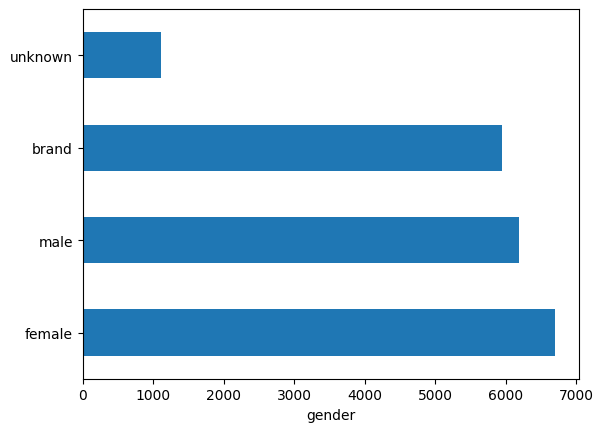

In [13]:
genderCount.plot(kind='barh', xlabel = 'gender')

### We will get the **mode** for the **retweet_count** column:

In [14]:
retweet_mode = twitter_Frame['retweet_count'].mode()
retweet_mode

0    0
Name: retweet_count, dtype: int64

This shows that most posts did not have any retweets.

In [15]:
retweetCount = twitter_Frame['retweet_count'].value_counts()

retweetCount

0      19431
1        499
2         56
3         17
6          8
5          7
4          6
7          5
8          3
11         3
12         2
20         2
10         2
36         1
9          1
23         1
49         1
153        1
15         1
13         1
330        1
19         1
Name: retweet_count, dtype: int64

<Axes: xlabel='retweetCount'>

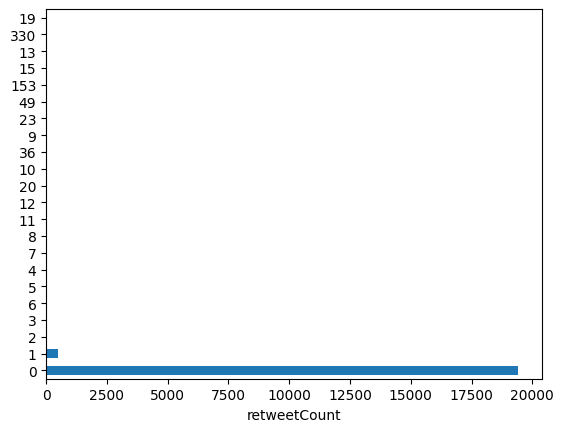

In [16]:
retweetCount.plot(kind='barh', xlabel = 'retweetCount')

We will now view a pie chart that shows the stats for those that did have retweets. (top 5 only)

In [17]:
retweetNonZero = twitter_Frame[twitter_Frame.retweet_count != 0]
retweetNonZeroMode = retweetNonZero['retweet_count'].mode()
retweetNonZeroMode

0    1
Name: retweet_count, dtype: int64

In [18]:
retweetNonZeroCount5 = retweetNonZero['retweet_count'].value_counts().nlargest(5)
retweetNonZeroCount5

1    499
2     56
3     17
6      8
5      7
Name: retweet_count, dtype: int64

<Axes: ylabel='retweet_count'>

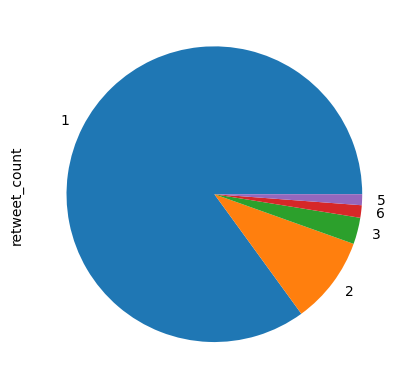

In [19]:
retweetNonZeroCount5.plot(kind='pie')

From the posts that did have retweets: the most frequent number of times a post was retweeted was 1. 

Below, we will get the unit_id of the tweets that have 20 most tweets. 

In [20]:
sort_by_retweet = twitter_Frame.sort_values('retweet_count', ascending=False)
sort_by_retweet20 = sort_by_retweet[['_unit_id', 'retweet_count']].head(20).reset_index(drop=True)
sort_by_retweet20

,_unit_id,retweet_count
0,815720445,330
1,815728145,153
2,815728382,49
3,815732670,36
4,815725314,23
5,815736381,20
6,815735307,20
7,815739006,19
8,815727244,15
9,815724427,13


### Now we will check the **most frequent words in description**:

### Helper Functions:

In [21]:
common = [
      "a",
      "able",
      "about",
      "absolute",
      "accept",
      "account",
      "achieve",
      "across",
      "act",
      "active",
      "actual",
      "add",
      "address",
      "admit",
      "advertise",
      "affect",
      "afford",
      "after",
      "afternoon",
      "again",
      "against",
      "age",
      "agent",
      "ago",
      "agree",
      "air",
      "all",
      "allow",
      "almost",
      "along",
      "already",
      "alright",
      "also",
      "although",
      "always",
      "america",
      "amount",
      "and",
      "another",
      "answer",
      "any",
      "apart",
      "apparent",
      "appear",
      "apply",
      "appoint",
      "approach",
      "appropriate",
      "area",
      "argue",
      "arm",
      "around",
      "arrange",
      "art",
      "as",
      "ask",
      "associate",
      "assume",
      "at",
      "attend",
      "authority",
      "available",
      "aware",
      "away",
      "awful",
      "baby",
      "back",
      "bad",
      "bag",
      "balance",
      "ball",
      "bank",
      "bar",
      "base",
      "basis",
      "be",
      "bear",
      "beat",
      "beauty",
      "because",
      "become",
      "bed",
      "before",
      "begin",
      "behind",
      "believe",
      "benefit",
      "best",
      "bet",
      "between",
      "big",
      "bill",
      "birth",
      "bit",
      "black",
      "bloke",
      "blood",
      "blow",
      "blue",
      "board",
      "boat",
      "body",
      "book",
      "both",
      "bother",
      "bottle",
      "bottom",
      "box",
      "boy",
      "break",
      "brief",
      "brilliant",
      "bring",
      "britain",
      "brother",
      "budget",
      "build",
      "bus",
      "business",
      "busy",
      "but",
      "buy",
      "by",
      "cake",
      "call",
      "can",
      "car",
      "card",
      "care",
      "carry",
      "case",
      "cat",
      "catch",
      "cause",
      "cent",
      "centre",
      "certain",
      "chair",
      "chairman",
      "chance",
      "change",
      "chap",
      "character",
      "charge",
      "cheap",
      "check",
      "child",
      "choice",
      "choose",
      "Christ",
      "Christmas",
      "church",
      "city",
      "claim",
      "class",
      "clean",
      "clear",
      "client",
      "clock",
      "close",
      "closes",
      "clothe",
      "club",
      "coffee",
      "cold",
      "colleague",
      "collect",
      "college",
      "colour",
      "come",
      "comment",
      "commit",
      "committee",
      "common",
      "community",
      "company",
      "compare",
      "complete",
      "compute",
      "concern",
      "condition",
      "confer",
      "consider",
      "consult",
      "contact",
      "continue",
      "contract",
      "control",
      "converse",
      "cook",
      "copy",
      "corner",
      "correct",
      "cost",
      "could",
      "council",
      "count",
      "country",
      "county",
      "couple",
      "course",
      "court",
      "cover",
      "create",
      "cross",
      "cup",
      "current",
      "cut",
      "dad",
      "danger",
      "date",
      "day",
      "dead",
      "deal",
      "dear",
      "debate",
      "decide",
      "decision",
      "deep",
      "definite",
      "degree",
      "department",
      "depend",
      "describe",
      "design",
      "detail",
      "develop",
      "die",
      "difference",
      "difficult",
      "dinner",
      "direct",
      "discuss",
      "district",
      "divide",
      "do",
      "doctor",
      "document",
      "dog",
      "door",
      "double",
      "doubt",
      "down",
      "draw",
      "dress",
      "drink",
      "drive",
      "drop",
      "dry",
      "due",
      "during",
      "each",
      "early",
      "east",
      "easy",
      "eat",
      "economy",
      "educate",
      "effect",
      "egg",
      "eight",
      "either",
      "elect",
      "electric",
      "eleven",
      "else",
      "employ",
      "encourage",
      "end",
      "engine",
      "english",
      "enjoy",
      "enough",
      "enter",
      "environment",
      "equal",
      "especial",
      "europe",
      "even",
      "evening",
      "ever",
      "every",
      "evidence",
      "exact",
      "example",
      "except",
      "excuse",
      "exercise",
      "exist",
      "expect",
      "expense",
      "experience",
      "explain",
      "express",
      "extra",
      "eye",
      "face",
      "fact",
      "fair",
      "fall",
      "family",
      "far",
      "farm",
      "fast",
      "father",
      "favour",
      "feed",
      "feel",
      "few",
      "field",
      "fight",
      "figure",
      "file",
      "fill",
      "film",
      "final",
      "finance",
      "find",
      "fine",
      "finish",
      "fire",
      "first",
      "fish",
      "fit",
      "five",
      "flat",
      "floor",
      "fly",
      "follow",
      "food",
      "foot",
      "for",
      "force",
      "forget",
      "form",
      "fortune",
      "forward",
      "four",
      "france",
      "free",
      "friday",
      "friend",
      "from",
      "front",
      "full",
      "fun",
      "function",
      "fund",
      "further",
      "future",
      "game",
      "garden",
      "gas",
      "general",
      "germany",
      "get",
      "girl",
      "give",
      "glass",
      "go",
      "god",
      "good",
      "goodbye",
      "govern",
      "grand",
      "grant",
      "great",
      "green",
      "ground",
      "group",
      "grow",
      "guess",
      "guy",
      "hair",
      "half",
      "hall",
      "hand",
      "hang",
      "happen",
      "happy",
      "hard",
      "hate",
      "have",
      "he",
      "head",
      "health",
      "hear",
      "heart",
      "heat",
      "heavy",
      "hell",
      "help",
      "here",
      "high",
      "history",
      "hit",
      "hold",
      "holiday",
      "home",
      "honest",
      "hope",
      "horse",
      "hospital",
      "hot",
      "hour",
      "house",
      "how",
      "however",
      "hullo",
      "hundred",
      "husband",
      "idea",
      "identify",
      "if",
      "imagine",
      "important",
      "improve",
      "in",
      "include",
      "income",
      "increase",
      "indeed",
      "individual",
      "industry",
      "inform",
      "inside",
      "instead",
      "insure",
      "interest",
      "into",
      "introduce",
      "invest",
      "involve",
      "issue",
      "it",
      "item",
      "jesus",
      "job",
      "join",
      "judge",
      "jump",
      "just",
      "keep",
      "key",
      "kid",
      "kill",
      "kind",
      "king",
      "kitchen",
      "knock",
      "know",
      "labour",
      "lad",
      "lady",
      "land",
      "language",
      "large",
      "last",
      "late",
      "laugh",
      "law",
      "lay",
      "lead",
      "learn",
      "leave",
      "left",
      "leg",
      "less",
      "let",
      "letter",
      "level",
      "lie",
      "life",
      "light",
      "like",
      "likely",
      "limit",
      "line",
      "link",
      "list",
      "listen",
      "little",
      "live",
      "load",
      "local",
      "lock",
      "london",
      "long",
      "look",
      "lord",
      "lose",
      "lot",
      "love",
      "low",
      "luck",
      "lunch",
      "machine",
      "main",
      "major",
      "make",
      "man",
      "manage",
      "many",
      "mark",
      "market",
      "marry",
      "match",
      "matter",
      "may",
      "maybe",
      "mean",
      "meaning",
      "measure",
      "meet",
      "member",
      "mention",
      "middle",
      "might",
      "mile",
      "milk",
      "million",
      "mind",
      "minister",
      "minus",
      "minute",
      "miss",
      "mister",
      "moment",
      "monday",
      "money",
      "month",
      "more",
      "morning",
      "most",
      "mother",
      "motion",
      "move",
      "mrs",
      "much",
      "music",
      "must",
      "name",
      "nation",
      "nature",
      "near",
      "necessary",
      "need",
      "never",
      "new",
      "news",
      "next",
      "nice",
      "night",
      "nine",
      "no",
      "non",
      "none",
      "normal",
      "north",
      "not",
      "note",
      "notice",
      "now",
      "number",
      "obvious",
      "occasion",
      "odd",
      "of",
      "off",
      "offer",
      "office",
      "often",
      "okay",
      "old",
      "on",
      "once",
      "one",
      "only",
      "open",
      "operate",
      "opportunity",
      "oppose",
      "or",
      "order",
      "organize",
      "original",
      "other",
      "otherwise",
      "ought",
      "out",
      "over",
      "own",
      "pack",
      "page",
      "paint",
      "pair",
      "paper",
      "paragraph",
      "pardon",
      "parent",
      "park",
      "part",
      "particular",
      "party",
      "pass",
      "past",
      "pay",
      "pence",
      "pension",
      "people",
      "per",
      "percent",
      "perfect",
      "perhaps",
      "period",
      "person",
      "photograph",
      "pick",
      "picture",
      "piece",
      "place",
      "plan",
      "play",
      "please",
      "plus",
      "point",
      "police",
      "policy",
      "politic",
      "poor",
      "position",
      "positive",
      "possible",
      "post",
      "pound",
      "power",
      "practise",
      "prepare",
      "present",
      "press",
      "pressure",
      "presume",
      "pretty",
      "previous",
      "price",
      "print",
      "private",
      "probable",
      "problem",
      "proceed",
      "process",
      "produce",
      "product",
      "programme",
      "project",
      "proper",
      "propose",
      "protect",
      "provide",
      "public",
      "pull",
      "purpose",
      "push",
      "put",
      "quality",
      "quarter",
      "question",
      "quick",
      "quid",
      "quiet",
      "quite",
      "radio",
      "rail",
      "raise",
      "range",
      "rate",
      "rather",
      "read",
      "ready",
      "real",
      "realise",
      "really",
      "reason",
      "receive",
      "recent",
      "reckon",
      "recognize",
      "recommend",
      "record",
      "red",
      "reduce",
      "refer",
      "regard",
      "region",
      "relation",
      "remember",
      "report",
      "represent",
      "require",
      "research",
      "resource",
      "respect",
      "responsible",
      "rest",
      "result",
      "return",
      "rid",
      "right",
      "ring",
      "rise",
      "road",
      "role",
      "roll",
      "room",
      "round",
      "rule",
      "run",
      "safe",
      "sale",
      "same",
      "saturday",
      "save",
      "say",
      "scheme",
      "school",
      "science",
      "score",
      "scotland",
      "seat",
      "second",
      "secretary",
      "section",
      "secure",
      "see",
      "seem",
      "self",
      "sell",
      "send",
      "sense",
      "separate",
      "serious",
      "serve",
      "service",
      "set",
      "settle",
      "seven",
      "sex",
      "shall",
      "share",
      "she",
      "sheet",
      "shoe",
      "shoot",
      "shop",
      "short",
      "should",
      "show",
      "shut",
      "sick",
      "side",
      "sign",
      "similar",
      "simple",
      "since",
      "sing",
      "single",
      "sir",      "sister",      "sit",      "site",      "situate",
      "six",      "size",      "sleep",      "slight",      "slow",      "small",
      "so",      "society",
      "some",
      "son",
      "soon",
      "sorry",
      "sort",
      "sound",
      "south",
      "space",
      "speak",
      "special",
      "specific",
      "speed",
      "spell",
      "spend",
      "square",
      "staff",
      "stage",
      "stairs",
      "stand",
      "standard",
      "start",
      "state",
      "station",
      "stay",
      "step",
      "stick",
      "still",
      "stop",
      "story",
      "straight",
      "strategy",
      "street",
      "strike",
      "strong",
      "structure",
      "student",
      "study",
      "stuff",
      "stupid",
      "subject",
      "succeed",
      "such",
      "sudden",
      "suggest",
      "suit",
      "summer",
      "sun",
      "sunday",
      "supply",
      "support",
      "suppose",
      "sure",
      "surprise",
      "switch",
      "system",
      "table",
      "take",
      "talk",
      "tape",
      "tax",
      "tea",
      "teach",
      "team",
      "telephone",
      "television",
      "tell",
      "ten",
      "tend",
      "term",
      "terrible",
      "test",
      "than",
      "thank",
      "the",
      "then",
      "there",
      "therefore",
      "they",
      "thing",
      "think",
      "thirteen",
      "thirty",
      "this",
      "thou",
      "though",
      "thousand",
      "three",
      "through",
      "throw",
      "thursday",
      "tie",
      "time",
      "to",
      "today",
      "together",
      "tomorrow",
      "tonight",
      "too",
      "top",
      "total",
      "touch",
      "toward",
      "town",
      "trade",
      "traffic",
      "train",
      "transport",
      "travel",
      "treat",
      "tree",
      "trouble",
      "true",
      "trust",
      "try",
      "tuesday",
      "turn",
      "twelve",
      "twenty",
      "two",
      "type",
      "under",
      "understand",
      "union",
      "unit",
      "unite",
      "university",
      "unless",
      "until",
      "up",
      "upon",
      "use",
      "usual",
      "value",
      "various",
      "very",
      "video",
      "view",
      "village",
      "visit",
      "vote",
      "wage",
      "wait",
      "walk",
      "wall",
      "want",
      "war",
      "warm",
      "wash",
      "waste",
      "watch",
      "water",
      "way",
      "we",
      "wear",
      "wednesday",
      "wee",
      "week",
      "weigh",
      "welcome",
      "well",
      "west",
      "what",
      "when",
      "where",
      "whether",
      "which",
      "while",
      "white",
      "who",
      "whole",
      "why",
      "wide",
      "wife",
      "will",
      "win",
      "wind",
      "window",
      "wish",
      "with",
      "within",
      "without",
      "woman",
      "wonder",
      "wood",
      "word",
      "work",
      "world",
      "worry",
      "worse",
      "worth",
      "would",
      "write",
      "wrong",
      "year", "yes", 'was', 'dont', 'his', 'has', 'cant', 'been', 'had', 'youre', 'you',
 'their','him', 'makes', 'going',  'were', 'u', 'thats', 'ive', 'did', 'made',
      "yesterday", "its",
      "yet", "them", "got", "her", "was"
      "you", "us", "an", "our",
      "young", "i", "my", "me", 'is', 'im', 'your', 'are', 'that', 'am']
def removeCommon(my_dict):
  for i in common:
    if i in my_dict:
      my_dict.pop(i)
  return my_dict


In [22]:
def greaterPercent(my_dict, sum, percent):
# def greater(my_dict, sum):
  top5 = {}
  percent5 = sum*percent/100
  for i in my_dict:
    if my_dict[i] > percent5:
      top5[i] = my_dict[i]

  return top5

In [23]:
def getSumDict(my_dict):
  sum = 0;
  for i in my_dict:
    sum += my_dict[i]
  return sum

### Desciption column calculation:

In [24]:
# Credit: https://stackoverflow.com/questions/55902042/how-to-keep-only-alphanumeric-and-space-and-also-ignore-non-ascii

values = list("abcdefghijklmnopqrstuvwxyz")
def remover(my_string):
  for item in my_string:
    if item not in values:
      my_string = my_string.replace(item, "")
  return my_string

wordDescFreq = {}
twitterString = twitter_Frame.astype(str)
desWords = twitterString['description'].apply(str.lower).str.split()

for tweet in desWords:
  for word in tweet:
    # word = ''.join(filter(str.isalpha(), word))
    word = remover(word)

    if word != '' and word != 'nan':
      if word in wordDescFreq: 
        wordDescFreq[word] += 1
      else: 
        wordDescFreq[word] = 1

wordDescFreqSorted = sorted(wordDescFreq.items(), key=lambda x:x[1], reverse=True)
wordDescFreqSortedDict = dict(wordDescFreqSorted)

In [25]:
filteredDescFreq = removeCommon(wordDescFreqSortedDict)  ## removes common words from dict

sumFilteredDesc = getSumDict(filteredDescFreq)  ## gets total number of words in dict

filteredDescFreq

{'fan': 464,
 'twitter': 351,
 'writer': 326,
 'lover': 318,
 'sports': 318,
 'tweets': 267,
 'things': 259,
 'instagram': 241,
 'media': 228,
 'marketing': 221,
 'official': 210,
 'ig': 209,
 'tweet': 205,
 'social': 205,
 'updates': 198,
 'artist': 189,
 'author': 180,
 'enthusiast': 177,
 'latest': 172,
 'football': 171,
 'blogger': 168,
 'snapchat': 166,
 'professional': 164,
 'de': 163,
 'online': 157,
 'games': 154,
 'living': 154,
 'loves': 145,
 'everything': 144,
 'views': 136,
 'proud': 134,
 'books': 133,
 'tv': 132,
 'being': 127,
 'editor': 126,
 'years': 126,
 'continuous': 121,
 'blog': 118,
 'email': 118,
 'mom': 116,
 'd': 114,
 'fashion': 114,
 's': 113,
 'better': 110,
 'x': 110,
 'events': 109,
 'born': 108,
 'friends': 108,
 'gamer': 108,
 'technology': 107,
 'la': 107,
 'beautiful': 104,
 'internet': 104,
 'sometimes': 103,
 'daily': 101,
 'tech': 101,
 'rip': 100,
 'personal': 100,
 'digital': 100,
 'politics': 98,
 'y': 97,
 'photographer': 97,
 'website': 96,
 

In [26]:
descPercent = greaterPercent(wordDescFreqSortedDict, sumFilteredDesc, 0.15)  ## gets words greater than percent freq
descPercent

{'fan': 464,
 'twitter': 351,
 'writer': 326,
 'lover': 318,
 'sports': 318,
 'tweets': 267,
 'things': 259,
 'instagram': 241,
 'media': 228,
 'marketing': 221,
 'official': 210,
 'ig': 209,
 'tweet': 205,
 'social': 205,
 'updates': 198,
 'artist': 189,
 'author': 180,
 'enthusiast': 177,
 'latest': 172,
 'football': 171,
 'blogger': 168,
 'snapchat': 166,
 'professional': 164,
 'de': 163,
 'online': 157}

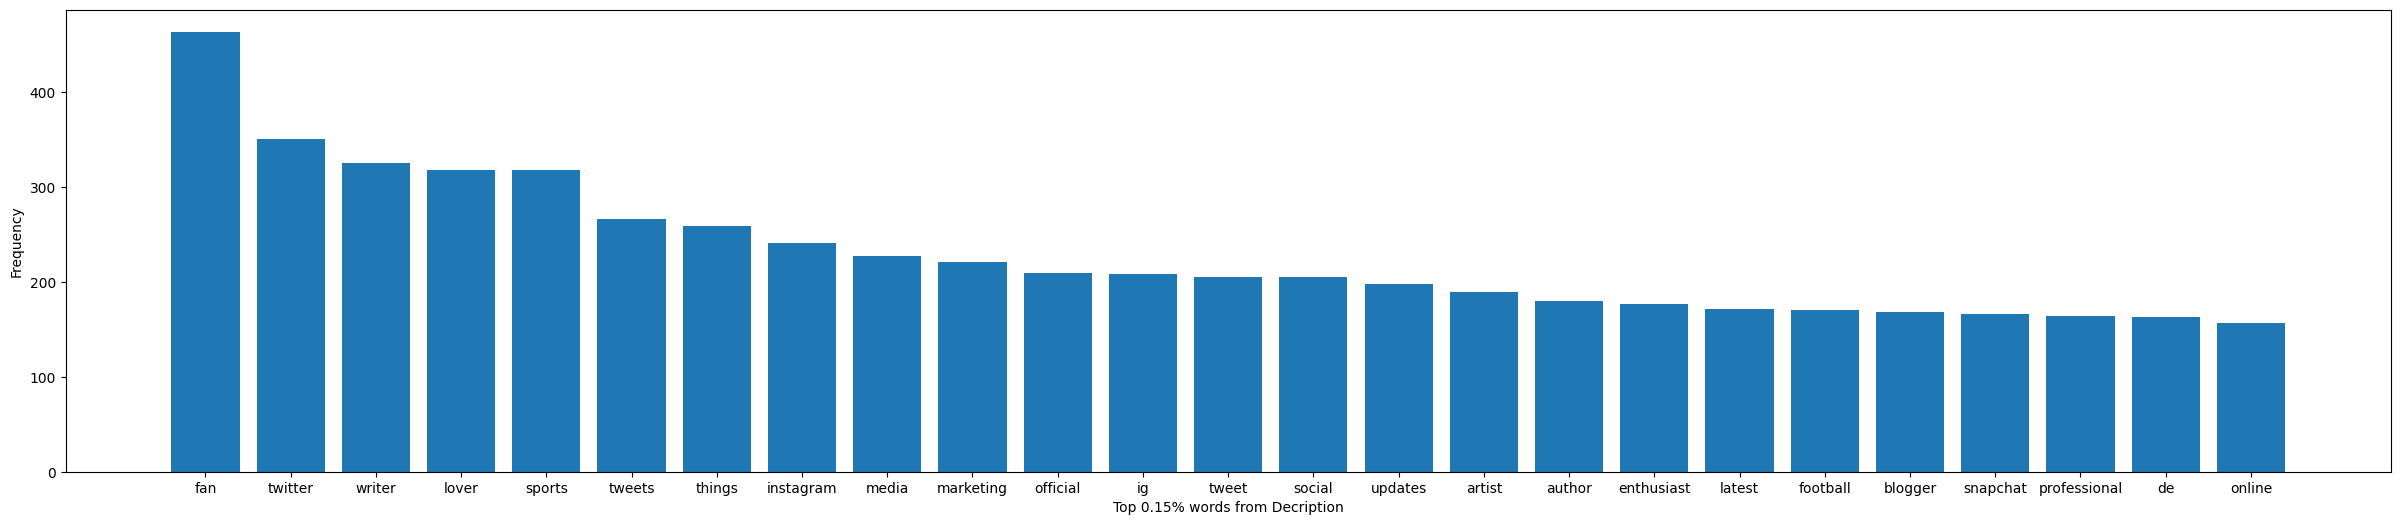

In [27]:
names = list(descPercent.keys())
values = list(descPercent.values())

plt.figure(figsize=(30,6))
plt.xlabel("Top 0.15% words from Decription")
plt.ylabel("Frequency")
plt.bar(range(len(descPercent)), values, tick_label=names)

plt.show()

### Text Column calculation

In [28]:
values2 = list("abcdefghijklmnopqrstuvwxyz")
def remover2(my_string = ""):
  for item in my_string:
    if item not in values2:
      my_string = my_string.replace(item, "")
  return my_string

wordTextFreq = {}
twitterString = twitter_Frame.astype(str)
desWords = twitterString['text'].apply(str.lower).str.split()

for tweet in desWords:
  for word in tweet:
    word = remover2(word)

    if word != '' and word != 'nan':
      if word in wordTextFreq: 
        wordTextFreq[word] += 1
      else: 
        wordTextFreq[word] = 1

wordTextFreqSorted = sorted(wordTextFreq.items(), key=lambda x:x[1], reverse=True)  # returns list after sorting dict from highest to lowest
wordTextFreqSortedDict = dict(wordTextFreqSorted) #converts list to dict

In [29]:
filteredTextFreq = removeCommon(wordTextFreqSortedDict)

sumFilteredText = getSumDict(filteredTextFreq)


In [30]:
textPercent = greaterPercent(wordTextFreqSortedDict, sumFilteredText, 0.15)

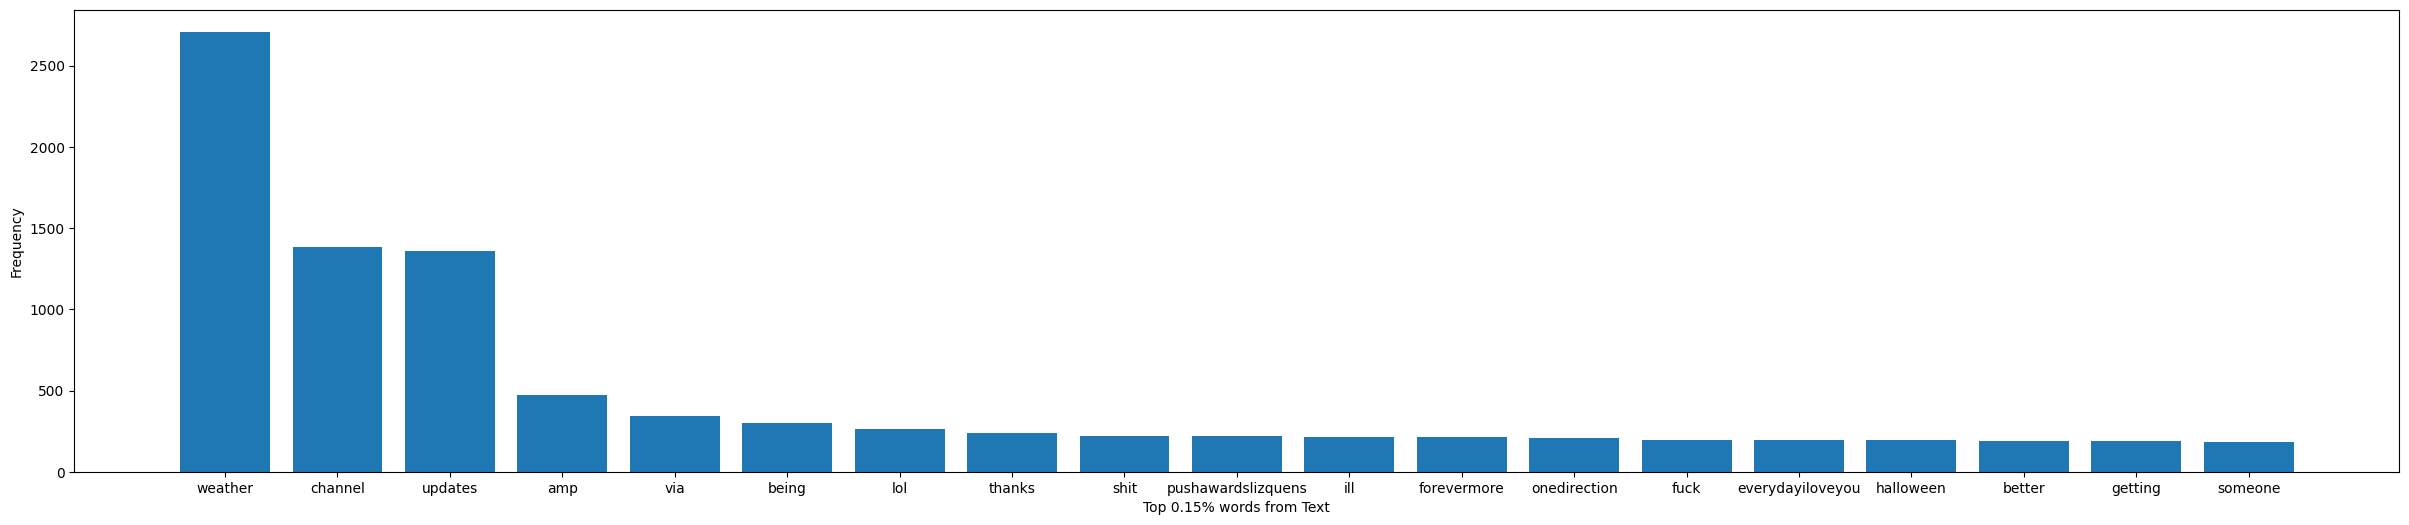

In [31]:
names = list(textPercent.keys())
values = list(textPercent.values())

plt.figure(figsize=(30,6))
plt.xlabel("Top 0.15% words from Text")
plt.ylabel("Frequency")
plt.bar(range(len(textPercent)), values, tick_label=names)

plt.show()

## MapReduce Description

In [32]:
positiveData = pd.read_csv('drive/My Drive/Training Data/positive-words.txt', encoding='ISO-8859-1')
positive = positiveData["Words"].tolist() 

negativeData = pd.read_csv('drive/My Drive/Training Data/negative-words.txt', encoding='ISO-8859-1')
negative = negativeData["Words"].tolist() 

In [33]:
twitterString = twitter_Frame.astype(str)
tDesc = twitterString['description']   # has all the original tweets

values3 = list("abcdefghijklmnopqrstuvwxyz")
def remover3(my_string):
  for item in my_string:
    if item not in values3:
      my_string = my_string.replace(item, "")
  return my_string


twitterString = twitter_Frame.astype(str)
desWords = twitterString['description'].apply(str.lower).str.split()

n = 0;  #assigns a unique n value to each tweet

reviewSentiment = {} # used to save n as key and score as value
descLen = {} # saves n as key and score/length as value

for tweet in desWords:
  length = 0
  reviewSentiment[n] = 0
  for word in tweet:
    length += 1
    word = remover3(word)
    if word in positive:
      reviewSentiment[n] += 1
    if word in negative:
      reviewSentiment[n] -= 1

  if reviewSentiment[n] != 0:
    descLen[n] = reviewSentiment[n]/length
  n += 1






In [34]:
reviewNonZeroDescription = {x:y for x,y in reviewSentiment.items() if y!=0}  # removes zero values

reviewSentimentHighest = dict(sorted(reviewNonZeroDescription.items(), key=lambda x:x[1], reverse=True))  # sorts highest to lowest
reviewSentimentLowest = dict(sorted(reviewNonZeroDescription.items(), key=lambda x:x[1], reverse=False))  # sorts lowest to highest 

Top 5 positive tweets:

In [35]:
print("Review 9356 (11): ", tDesc[9356])
print("Review 12282 (8): ", tDesc[12282])
print("Review 3887 (7): ", tDesc[3887])
print("Review 801 (6): ", tDesc[801])
print("Review 8695 (6): ", tDesc[8695])

Review 9356 (11):  Intelligent. Beautiful. Blessed. Assertive. Independent. Happy. Loves God. Loves Family. Loves Life. Loves to Laugh. Loves to give Love and Loves to be Loved.
Review 12282 (8):  Love all living creatures and God; Friendly, joyful, fair, and trusting (but perceptive). Very logical but live by faith. Highly educated country boy at heart.
Review 3887 (7):  ARSENALOVER_ Quaintrelle  #Working_OTÏ_   Love Joy  PeaceÏÎ Patience Kindness Goodness Faithfulnes Humility Selfcontrol  Kagicha
Review 801 (6):  I love to work alot and great relationships friends and family . Its great have alot of fun as well .
Review 8695 (6):  Being nice is cool! What's not cool is being mean! Stay cool kids. Sparkle Time Classic Pumpkin is my baby. #ItsJustAGame!


Top 5 negative tweets:

In [36]:
print("Review 14297  (-7): ", tDesc[14297])
print("Review 1625  (-6): ", tDesc[1625])
print("Review 2748  (-6): ", tDesc[2748])
print("Review 11156   (-6): ", tDesc[11156 ])
print("Review 290   (-5): ", tDesc[290 ])
print("Review 1026   (-5): ", tDesc[1026 ])

Review 14297  (-7):  Left the Left & now Anarchist. Hate governments, poverty, racism, cruelty, discrimination, abuse, particularly child abuse. Love human rights & justice.
Review 1625  (-6):  I'm tired of the corruption, lies & career politicians ! its time to stop the madness .done watching incompetence & greed ruin America, my country  Go Trump
Review 2748  (-6):  I say dumb shit and I do dumb shit, but I sure as hell aint dumb
Review 11156   (-6):  Foolish, idiotic, impractical, petty, pointless and senseless.
Review 290   (-5):  How to Quit Paying for Expensive Medical Visits and Fake Fixes, and Eliminate His Frustrating, Nagging and Constantly Repeating Low Back Pain.
Review 1026   (-5):  When I die I wanna go to hell cause I'm a piece of shit it ain't hard to fucking tell.


In [37]:
# contains score / len values for description column sorted from highest to lowest 
descLen = dict(sorted(descLen.items(), key=lambda x:x[1], reverse=True))  # sorts highest to lowest

# MapReduce Text

In [38]:
twitterString = twitter_Frame.astype(str)
textDesc = twitterString['text']

values3 = list("abcdefghijklmnopqrstuvwxyz")
def remover3(my_string):
  for item in my_string:
    if item not in values3:
      my_string = my_string.replace(item, "")
  return my_string


twitterString = twitter_Frame.astype(str)
textWords = twitterString['text'].apply(str.lower).str.split()

n = 0;  #assigns a unique n value to each tweet

reviewTSentiment = {}  # used to save n as key and score as value
textLen = {} # saves n as key and score/length as value

for tweet in textWords:
  length = 0;
  reviewTSentiment[n] = 0
  for word in tweet:
    length += 1;
    word = remover3(word)
    if word in positive:
      reviewTSentiment[n] += 1
    if word in negative:
      reviewTSentiment[n] -= 1

  if reviewTSentiment[n] != 0:
    textLen[n] = reviewTSentiment[n]/length
  n += 1



In [39]:
reviewNonZeroText = {x:y for x,y in reviewTSentiment.items() if y!=0}  # removes zero values
reviewTSentimentHighest = dict(sorted(reviewNonZeroText.items(), key=lambda x:x[1], reverse=True))  # sorts highest to lowest
reviewTSentimentLowest = dict(sorted(reviewNonZeroText.items(), key=lambda x:x[1], reverse=False))  # sorts lowest to highest 

Top 5 positive text tweets:

In [40]:
print("Review 15187  (7): ", textDesc[15187])
print("Review 14484  (6): ", textDesc[14484])
print("Review 16900  (6): ", textDesc[16900])
print("Review 17123  (6): ", textDesc[17123])
print("Review 554  (5): ", textDesc[554])

Review 15187  (7):  Like the Golden Bun Award for best burger in #YQL what's your favorite pizza place and what pizza you love. Winner takes home all the dough.
Review 14484  (6):  hugs and pretty dresses and jean jackets and louis and everything tiny and love love love love love https://t.co/TkX8C6k7M7
Review 16900  (6):  Could be happier and thankful to work with such a talented passionate, dedicated, team! @sebashei and... https://t.co/ZwTVMiq4T2
Review 17123  (6):  Very proud of your accomplishments, my sweet and talented Rob... I am very happy to be with you _Ù÷ä_Ù÷÷_Ù÷÷

Love, always _ÙÕÑ
Review 554  (5):  hi angel @NiallOfficial; i love all the tracks from #MadeInTheAM so far, they're amazing! i'm so proud, mind following lifesaver?  ÛÓ  12,301


Top 5 negative text tweets:

In [41]:
print("Review 12976 (7): ", textDesc[12976])
print("Review 2960 (6): ", textDesc[2960])
print("Review 8955 (6): ", textDesc[8955])
print("Review 11621 (6): ", textDesc[11621])
print("Review 12157 (5): ", textDesc[12157])

Review 12976 (7):  Some die saintly in faith and hopeÛÓ
Some die thus in a prison-yardÛÓ
Some die broken by rape or the rope;
 Some die easily. Some die hard
Review 2960 (6):  RIP to the girl who was just murdered by her biology test. You prob won't be missed but sucks to go out that way #rip #shame
Review 8955 (6):  Walking Dead Fan Brutally Murders Friend Who He Says Was Turning Into A Zombie ÛÓ Get The Crazy Scary Details HEREÛ_ https://t.co/SQ1v8CCTFV
Review 11621 (6):  @MassimoFaggioli @antoniospadaro @JamesMartinSJ @ThomasReeseSJ Sad and pathetic propaganda - and you're going to lose. #janus #heresy
Review 12157 (5):  @kahentehorn so pathetic you block me over a bullshit lie ? Not even say anything nah fuck that we aint done and i aint letting it ruin us


Top 5 highest score/len text tweets:

In [42]:
print("Review 9456  (0.5): ", textDesc[9456])
print("Review 11517  (0.5): ", textDesc[11517])
print("Review 12064  (0.5): ", textDesc[12064])
print("Review 19677  (0.5): ", textDesc[19677])
print("Review 12330  (0.4286): ", textDesc[12330])

Review 9456  (0.5):  the pride is thriving right now
Review 11517  (0.5):  @Schrock_And_Awe amazing
Review 12064  (0.5):  @_jasmine_jae sexy and beautiful!
Review 19677  (0.5):  Interesting! https://t.co/BRtsG0soiN
Review 12330  (0.4286):  Feeling great today and that's pretty cool


In [46]:
print("Review 17763  (-0.75): ", textDesc[17763])
print("Review 13413  (-0.666): ", textDesc[13413])
print("Review 7716  (-0.5): ", textDesc[7716])
print("Review 10603  (-0.5): ", textDesc[10603])
print("Review 19827  (-0.5): ", textDesc[19827])

Review 17763  (-0.75):  Dirt nasty and shit
Review 13413  (-0.666):  stupid and sad
Review 7716  (-0.5):  @mandafirepanda the harsh bullying.
Review 10603  (-0.5):  And fever
Review 19827  (-0.5):  Very dumb and mad


In [45]:
# contains score / len values for text column sorted from highest to lowest 
textLen = dict(sorted(textLen.items(), key=lambda x:x[1], reverse=False))  # sorts highest to lowest
textLen

{17763: -0.75,
 13413: -0.6666666666666666,
 7716: -0.5,
 10603: -0.5,
 19827: -0.5,
 15836: -0.4444444444444444,
 428: -0.4,
 11721: -0.4,
 12346: -0.4,
 17712: -0.4,
 18519: -0.4,
 10301: -0.375,
 15663: -0.375,
 714: -0.3333333333333333,
 1996: -0.3333333333333333,
 3268: -0.3333333333333333,
 3375: -0.3333333333333333,
 4243: -0.3333333333333333,
 4593: -0.3333333333333333,
 6134: -0.3333333333333333,
 6693: -0.3333333333333333,
 6791: -0.3333333333333333,
 8356: -0.3333333333333333,
 8590: -0.3333333333333333,
 10982: -0.3333333333333333,
 12004: -0.3333333333333333,
 12265: -0.3333333333333333,
 12663: -0.3333333333333333,
 12889: -0.3333333333333333,
 13150: -0.3333333333333333,
 13560: -0.3333333333333333,
 13986: -0.3333333333333333,
 14185: -0.3333333333333333,
 14372: -0.3333333333333333,
 14375: -0.3333333333333333,
 15995: -0.3333333333333333,
 17153: -0.3333333333333333,
 17204: -0.3333333333333333,
 17425: -0.3333333333333333,
 17431: -0.3333333333333333,
 18100: -0.3333

In [44]:
# for t in reviewTSentimentLowest:
#   print("Review ", t, ": ", reviewTSentimentLowest[t])